In [110]:
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("./datas/Marvel Vs DC NEW.csv")

In [112]:
df

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
0,0,Eternals,-2021,"Action,Adventure,Drama",0,"The saga of the Eternals, a race of immortal b...",0.0
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",0,A new Marvel chapter with Loki at its center.,0.0
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",0,A continuation of Spider-Man: Far From Home.,0.0
...,...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,(2016– ),"Action,Adventure,Drama",42 min,"Worlds lived, worlds died. Nothing will ever b...",8.5
1686,1686,Supergirl,(2015–2021),"Action,Adventure,Drama",42 min,"In the wake of Lex Luthor's return, the show f...",8.3
1687,1687,Supergirl,(2015–2021),"Action,Adventure,Drama",42 min,Kara comes face to face with Red Daughter and ...,8.1
1688,1688,Supergirl,(2015–2021),"Action,Adventure,Drama",42 min,Kara and Lena head to Kaznia to hunt down Lex....,7.4


In [113]:
df = df.drop(['Year'], axis=1)

In [114]:
df.isnull().sum()   

ID             0
Movie          0
Genre          7
RunTime        0
Description    0
IMDB_Score     0
dtype: int64

In [115]:
# null인 행 지우기
df = df.dropna(subset=['Genre'])
print(df.isnull().sum())

ID             0
Movie          0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
dtype: int64


In [116]:
# RunTime이 (String)0인 행 지우기
df = df[df['RunTime'] != '0']

# IMDB_Score가 0인 행의 개수, 11개만 있으므로 평점이 입력되지 않은게 아니라 평점을 0.0으로 입력한 것으로 간주
print(df[df['IMDB_Score'] == 0.0]) 


        ID                      Movie                    Genre  RunTime  \
5        5                Black Widow  Action,Adventure,Sci-Fi  133 min   
36      36                    Hawkeye   Action,Adventure,Crime   60 min   
243    243                   The Talk                Talk-Show   38 min   
244    244    The Drew Barrymore Show                Talk-Show   44 min   
517    517                 Metropolis       Action,Crime,Drama   60 min   
529    529                 Project 13       Action,Crime,Drama   45 min   
570    570                  Film Club              Documentary   45 min   
584    584  The Super Human In Us All              Documentary   49 min   
1074  1074        Krypto the Superdog  Animation,Action,Comedy   22 min   
1521  1521                   Gruen XL         Comedy,Talk-Show   37 min   
1571  1571        DC Super Hero Girls   Animation,Short,Action   21 min   

                                            Description  IMDB_Score  
5     A film about Natasha Ro

In [117]:
df

,ID,Movie,Genre,RunTime,Description,IMDB_Score
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50 min,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,"Action,Comedy,Drama",350 min,Blends the style of classic sitcoms with the M...,8.1
5,5,Black Widow,"Action,Adventure,Sci-Fi",133 min,A film about Natasha Romanoff in her quests be...,0.0
6,6,Avengers: Endgame,"Action,Adventure,Drama",181 min,After the devastating events of Avengers: Infi...,8.4
7,7,Guardians of the Galaxy,"Action,Adventure,Comedy",121 min,A group of intergalactic criminals must pull t...,8.0
...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,"Action,Adventure,Drama",42 min,"Worlds lived, worlds died. Nothing will ever b...",8.5
1686,1686,Supergirl,"Action,Adventure,Drama",42 min,"In the wake of Lex Luthor's return, the show f...",8.3
1687,1687,Supergirl,"Action,Adventure,Drama",42 min,Kara comes face to face with Red Daughter and ...,8.1
1688,1688,Supergirl,"Action,Adventure,Drama",42 min,Kara and Lena head to Kaznia to hunt down Lex....,7.4


In [118]:
# 데이터 정제
df.columns = df.columns.str.strip()
df['IMDB_Score'] = pd.to_numeric(df['IMDB_Score'], errors='coerce')
df['RunTime'] = df['RunTime'].str.replace(' min', '', regex=False)
df

,ID,Movie,Genre,RunTime,Description,IMDB_Score
2,2,The Falcon and the Winter Soldier,"Action,Adventure,Drama",50,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,"Action,Comedy,Drama",350,Blends the style of classic sitcoms with the M...,8.1
5,5,Black Widow,"Action,Adventure,Sci-Fi",133,A film about Natasha Romanoff in her quests be...,0.0
6,6,Avengers: Endgame,"Action,Adventure,Drama",181,After the devastating events of Avengers: Infi...,8.4
7,7,Guardians of the Galaxy,"Action,Adventure,Comedy",121,A group of intergalactic criminals must pull t...,8.0
...,...,...,...,...,...,...
1685,1685,DC's Legends of Tomorrow,"Action,Adventure,Drama",42,"Worlds lived, worlds died. Nothing will ever b...",8.5
1686,1686,Supergirl,"Action,Adventure,Drama",42,"In the wake of Lex Luthor's return, the show f...",8.3
1687,1687,Supergirl,"Action,Adventure,Drama",42,Kara comes face to face with Red Daughter and ...,8.1
1688,1688,Supergirl,"Action,Adventure,Drama",42,Kara and Lena head to Kaznia to hunt down Lex....,7.4


In [119]:
movie_score_group_mean = df.groupby('Movie')['IMDB_Score'].mean()
movie_score_group_mean

Movie
A Sneek Peak at Justice League: Doom                6.000000
Adventures of Superman                              7.700000
Agent Cody Banks                                    5.100000
Agents of S.H.I.E.L.D.                              8.588043
Ant-Man                                             7.300000
                                                      ...   
Wonder Woman: A Subversive Dream                    7.100000
Wonder Woman: The Ultimate Feminist Icon            7.700000
X-Men: Evolution                                    7.400000
You Will Believe: The Cinematic Saga of Superman    7.900000
Young Justice                                       8.729167
Name: IMDB_Score, Length: 245, dtype: float64

In [120]:
# 영화별 평점 평균 구하기기
movie_score_group = df.groupby('Movie')['IMDB_Score'].mean().sort_values(ascending=True)
movie_score_group

Movie
Black Widow                  0.000000
Hawkeye                      0.000000
Film Club                    0.000000
Gruen XL                     0.000000
The Drew Barrymore Show      0.000000
                               ...   
The Punisher                 8.807692
Body and Soul                9.000000
The Dark Knight              9.000000
Smallville Season 3 Promo    9.100000
Duck Dodgers                 9.200000
Name: IMDB_Score, Length: 245, dtype: float64

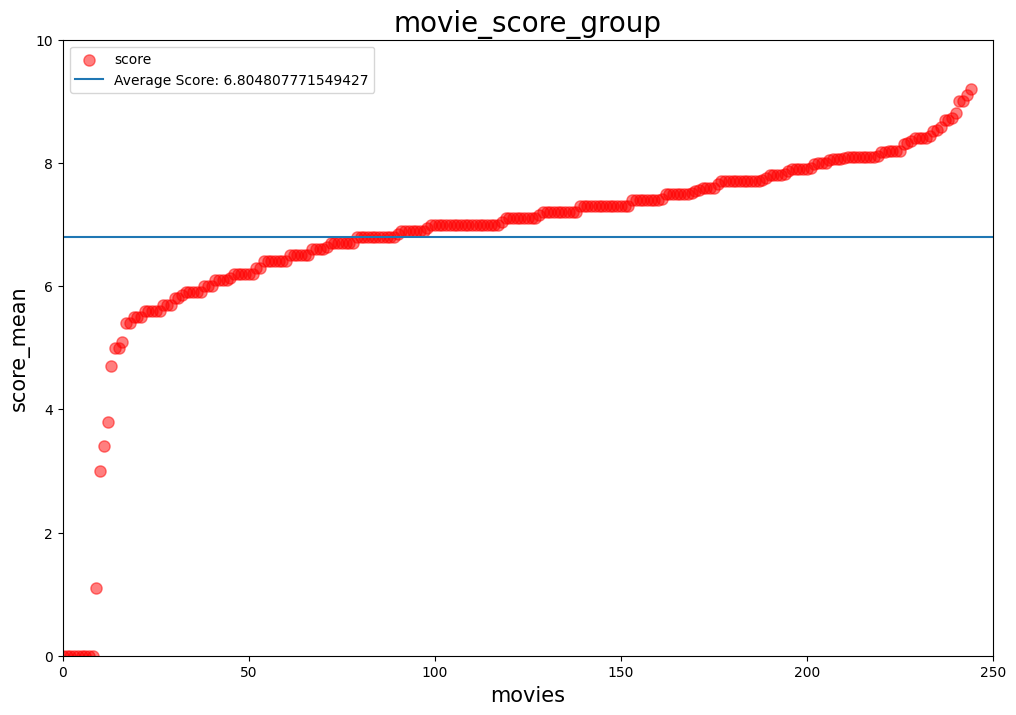

평균 평점: 6.804807771549427
최고 평점: 9.2, 영화 : Duck Dodgers
최저 평점: 0.0


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 각 영화 평점 평균을 모두 표시한 것
plt.figure(figsize=(12, 8))
plt.scatter(length, movie_score_group.values, alpha=0.5, s=65, color='red', label='score') 
plt.title('movie_score_group', fontsize=20)
plt.xlabel('movies', fontsize=15)
plt.ylabel('score_mean', fontsize=15)
plt.axhline(y=movie_score_group.mean(), linestyle='-', label=f'Average Score: {movie_score_group.mean()}')
plt.ylim(0, 10)
plt.xlim(0, 250)
plt.legend(fontsize=10, loc='upper left')
plt.show()

print(f"평균 평점: {movie_score_group.mean()}")
print(f"최고 평점: {movie_score_group.max()}, 영화 : {movie_score_group.index[244]}")
print(f"최저 평점: {movie_score_group.min()}")

In [188]:
df_movie_score_group = pd.DataFrame(movie_score_group[-10:][:]).round(2)


C:\Users\manun\AppData\Local\Temp\ipykernel_37528\3704967198.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

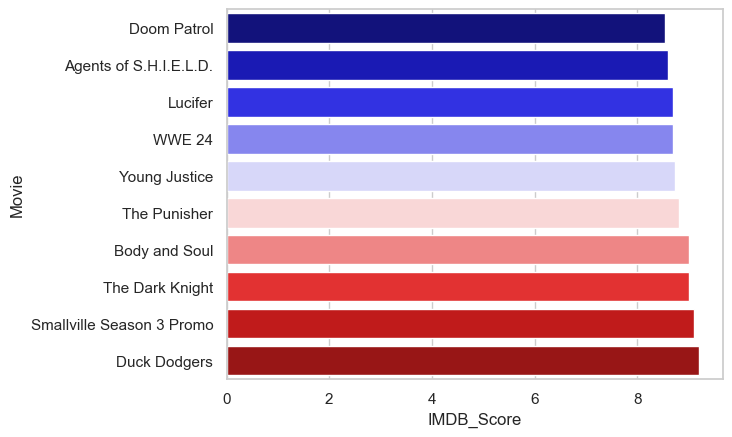

In [189]:

# 상위 영화 10개를 뽑아서 바 차트 만들기
width = 0.5

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='h',
            palette='seismic'
            )

C:\Users\manun\AppData\Local\Temp\ipykernel_37528\1853719377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Score',


<Axes: xlabel='IMDB_Score', ylabel='Movie'>

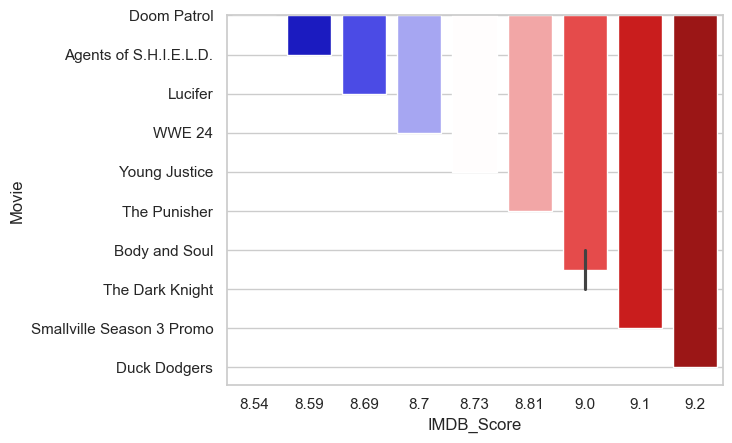

In [190]:

# 상위 영화 10개를 뽑아서 바 차트 만들기

sns.set_theme(style="whitegrid")
sns.barplot(x='IMDB_Score',
            y='Movie',
            data=pd.DataFrame(df_movie_score_group[-10:][:]),
            orient='v',
            palette='seismic'
            )

In [ ]:
# Genre에서 ,을 ' '로 변경
df['Genre'] = df['Genre'].str.replace(',', ' ')
df.head

,ID,Movie,Genre,RunTime,Description,IMDB_Score
2,2,The Falcon and the Winter Soldier,Action Adventure Drama,50,"Following the events of 'Avengers: Endgame,' S...",7.5
3,3,WandaVision,Action Comedy Drama,350,Blends the style of classic sitcoms with the M...,8.1


In [ ]:
from collections import Counter
from kiwipiepy import Kiwi

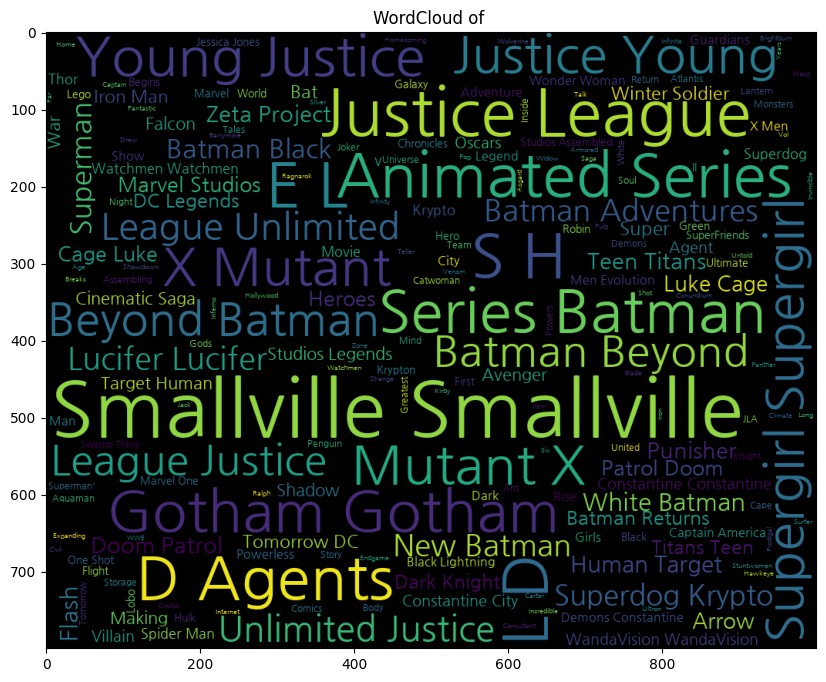

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Movie']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.title("WordCloud of ")
plt.show()

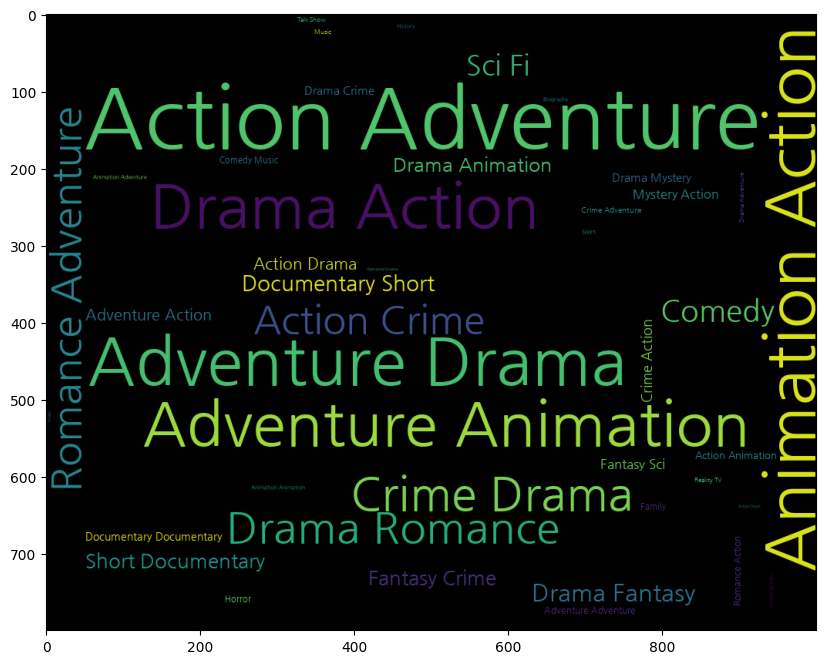

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf",
    width=1000,
    height=800,
).generate(' '.join(df['Genre']))

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.show()

In [ ]:
# 장르와, 각 장르의 개수를 차트로!
print(df.head())

   ID                              Movie                    Genre RunTime  \
2   2  The Falcon and the Winter Soldier   Action Adventure Drama      50   
3   3                        WandaVision      Action Comedy Drama     350   
5   5                        Black Widow  Action Adventure Sci-Fi     133   
6   6                  Avengers: Endgame   Action Adventure Drama     181   
7   7            Guardians of the Galaxy  Action Adventure Comedy     121   

                                         Description  IMDB_Score  
2  Following the events of 'Avengers: Endgame,' S...         7.5  
3  Blends the style of classic sitcoms with the M...         8.1  
5  A film about Natasha Romanoff in her quests be...         0.0  
6  After the devastating events of Avengers: Infi...         8.4  
7  A group of intergalactic criminals must pull t...         8.0  


In [ ]:
genres = ""
for len in df['Genre'].unique():
    len = len.replace('-', '')
    genres += (len + " ")
    
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type="sbg")
committed_tags = set(["NNG", "NNP"])

tag_counter = Counter()

list_words = [token.form for token in kiwi.tokenize(genres)]

tag_counter.update(list_words)



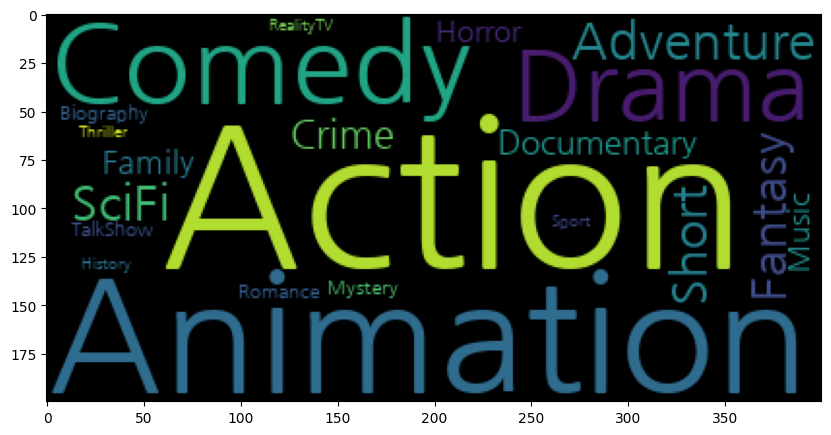

In [ ]:
word_cloud = WordCloud(
    font_path="C:\\Users\\manun\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf"
)
wc_figure = word_cloud.generate_from_frequencies(tag_counter)

plt.figure(figsize=(10, 8))
plt.imshow(wc_figure)
plt.show()

In [ ]:
list_words = pd.Series(list_words)
unique_list = list_words.unique()
count_genre = []

for genre in unique_list:
    for 



SyntaxError: invalid syntax (849927613.py, line 6)